# 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

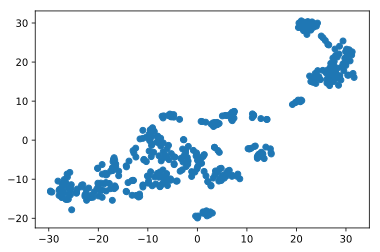

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# 2

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [9]:
train_labels = model.fit_predict(X_train_scaled)

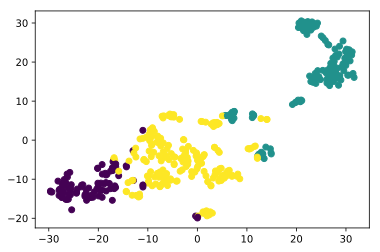

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [12]:
clastered_data = X_train.copy()
clastered_data["claster"] = train_labels
clastered_data["price"] = y_train
clastered_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,claster,price
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2,18.2


In [13]:
clastered_data.loc[clastered_data["claster"] == 0, ["CRIM", "price"]].mean()

CRIM      0.073566
price    27.788372
dtype: float64

In [14]:
clastered_data.loc[clastered_data["claster"] == 1, ["CRIM", "price"]].mean()

CRIM     10.797028
price    16.165354
dtype: float64

In [15]:
clastered_data.loc[clastered_data["claster"] == 2, ["CRIM", "price"]].mean()

CRIM      0.421660
price    24.958115
dtype: float64

# 3

In [16]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.010354,0.000000,0.588143,0.000000,4.338258,9.054816,3.007841,1.243219,0.582813,1.783488,7.457520,4.324619,1.272957
1,0.006367,1.729819,0.930864,3.874063,3.802355,9.537476,1.176670,1.915637,0.466250,1.530426,7.906769,4.339928,0.497073
2,0.011929,0.000000,4.028417,0.000000,5.180390,8.443729,3.533587,0.877624,0.466250,4.283988,9.029889,4.265682,2.544506
3,0.010338,0.000000,1.569834,0.000000,3.513138,8.559455,0.278967,2.483948,0.466250,1.837716,8.625566,4.274430,0.777292
4,0.574248,0.000000,2.628491,0.000000,6.065055,8.886873,3.283232,1.112569,2.797502,4.012849,9.074814,4.210790,2.431855


In [17]:
test_labels = model.predict(X_test_scaled)

clastered_test_data = X_test.copy()
clastered_test_data["claster"] = test_labels
clastered_test_data["price"] = y_test
clastered_test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,claster,price
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,2,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,0,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,1,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,2,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,1,16.1


In [18]:
clastered_test_data.loc[clastered_test_data["claster"] == 0, ["CRIM", "price"]].mean()

CRIM      0.06206
price    31.35000
dtype: float64

In [19]:
clastered_test_data.loc[clastered_test_data["claster"] == 1, ["CRIM", "price"]].mean()

CRIM     10.165531
price    16.437143
dtype: float64

In [20]:
clastered_test_data.loc[clastered_test_data["claster"] == 2, ["CRIM", "price"]].mean()

CRIM      0.266079
price    21.860784
dtype: float64